In [1]:
#loading datasets
import pandas as pd
diabetes = pd.read_csv('/Users/WanYi/Google 雲端硬碟/大學報告、作業/畢業專題/AI戰鬥營 SummerLesson/pima-indians-diabetes.csv')
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [2]:
#Cleaning Data
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps', 'Insulin', 'BMI', 'Pedigree']
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [3]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [19]:
#Importing Tensorfl
import tensorflow as tf

In [23]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

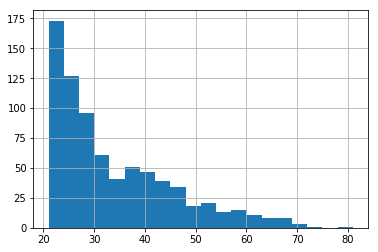

In [24]:
#Categorical features
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

#Converting continuous to categorical
import matplotlib.pyplot as plt
%matplotlib inline
diabetes['Age'].hist(bins=20)

In [25]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries = [20,30,40,50,60,70,80])

#Combining all the features
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_buckets]

#Splitting the data
x_data = diabetes.drop('Class', axis =1)
labels = diabetes['Class']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size =0.33, random_state =101)

In [26]:
#Applying input function
input_func = tf.estimator.inputs.pandas_input_fn(x = x_train, y = y_train, batch_size = 10, num_epochs = 1000, shuffle = True)

#Creating the model
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes =2)
model.train(input_fn = input_func, steps =1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_device_fn': None, '_save_checkpoints_secs': 600, '_train_distribute': None, '_master': '', '_global_id_in_cluster': 0, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/6l/h2bf0vz14bx8lwf9f039d45m0000gn/T/tmpbamplkcm', '_service': None, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_session_config': None, '_evaluation_master': '', '_task_type': 'worker', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1170066d8>, '_num_worker_replicas': 1, '_tf_random_seed': None}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 i

In [28]:
#Prediction
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, batch_size = 10, num_epochs = 1, shuffle = False)
predictions = model.predict(pred_input_func)
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6l/h2bf0vz14bx8lwf9f039d45m0000gn/T/tmpbamplkcm/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.52190286], dtype=float32),
  'logits': array([0.08766747], dtype=float32),
  'probabilities': array([0.47809717, 0.52190286], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.61982524], dtype=float32),
  'logits': array([0.4888065], dtype=float32),
  'probabilities': array([0.3801748 , 0.61982524], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.37157258], dtype=float32),
  'logits': array([-0.52547634], dtype=float32),
  'probabilities': array([0.62842745, 0.3715726 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.32376707], dtype=float32),
  'logits': array([-0.7365132], dtype=float32),
  'probabilities': array([0.67623293, 0.3237671 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=

In [29]:
#evaluating the model
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-18-06:28:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6l/h2bf0vz14bx8lwf9f039d45m0000gn/T/tmpbamplkcm/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-18-06:28:20
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72834647, accuracy_baseline = 0.65748036, auc = 0.78622067, auc_precision_recall = 0.62412477, average_loss = 0.5322964, global_step = 1000, label/mean = 0.34251967, loss = 5.2001266, precision = 0.6184211, prediction/mean = 0.36583832, recall = 0.54022986
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/6l/h2bf0vz14bx8lwf9f039d45m0000gn/T/tmpbamplkcm/model.ckpt-1000


In [30]:
results

{'accuracy': 0.72834647,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78622067,
 'auc_precision_recall': 0.62412477,
 'average_loss': 0.5322964,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2001266,
 'precision': 0.6184211,
 'prediction/mean': 0.36583832,
 'recall': 0.54022986}